In [ ]:
import pandas as pd

fight_details_file = pd.read_csv('../data/fight_details.csv')
event_details_file = pd.read_csv('../data/event_details.csv')

columns = [
  'event_name',
  'date',
  'r_name',
  'r_sig_str_landed',
  'b_name',
  'b_sig_str_landed',
  'winner'
]

df = pd.merge(
  fight_details_file,
  event_details_file,
  on=['event_id', 'fight_id'],
  how='inner'
)[columns]

df['date'] = pd.to_datetime(df['date'])

df_grouped = df.groupby(['event_name','date'])
first_5_groups_keys = list(df_grouped.groups.keys())[:5]
last_5_events = pd.concat([df_grouped.get_group(x) for x in first_5_groups_keys])

sig_str_group = last_5_events.groupby(['event_name','date'])[['r_sig_str_landed','b_sig_str_landed']]
sig_str_group.mean()


AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

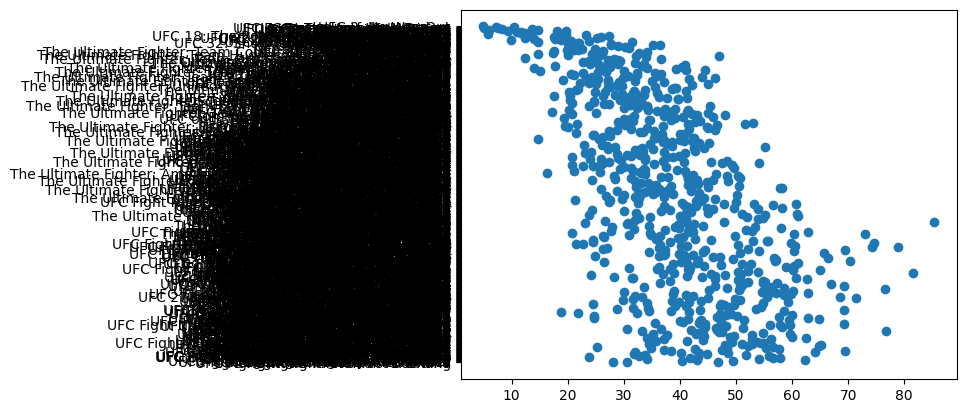

In [51]:
import matplotlib.pyplot as plt

plt.scatter(sig_str_group['r_sig_str_landed'], [x[0] for x in sig_str_group.index.values])
